Considere a tabela a seguir com 10 grandes multinacionais e seus respectivos países de origem:

Empresa | País de origem
--- | ---
Exxon Mobil | 1
JP Morgan Chase | 1
General Electric | 1
Royal Dutch Shell | 2
ICBC | 3
HSBC Holdings | 4
PetroChina | 3
Berkshire Hathaway | 1
Wells Fargo | 1
Petrobras | 5

Observe que os países de origem das empresas são representados por números inteiros. Neste caso, os números são apenas rótulos para as categorias de países de origem (Estados Unidos, 1; Holanda, 2; China, 3; Reino Unido, 4; Brasil, 5). Não faz sentido somar, subtrair, multiplicar ou dividir os números que representam os países de origem das empresas. Portanto, a escala de mensuração é nominal.

In [1]:
import pandas as pd

# passando a tabela exemplo para um dicionário
empresas = {
    "Exxon Mobil": 1,
    "JP Morgan Chase": 1,
    "General Electric": 1,
    "Royal Dutch Shell": 2,
    "ICBC": 3,
    "HSBC Holdings": 4,
    "PetroChina": 3,
    "Berkshire Hathaway": 1,
    "Wells Fargo": 1,
    "Petrobras": 5,
}

# dicionário com os países
paises = {
    1: "Estados Unidos",
    2: "Holanda",
    3: "China",
    4: "Reino Unido",
    5: "Brasil",
}

In [ ]:
df_empresa = pd.DataFrame(empresas.items(),columns=['empresa',"codigo_pais"])

df_empresa



,empresa,codigo_pais
0,Exxon Mobil,1
1,JP Morgan Chase,1
2,General Electric,1
3,Royal Dutch Shell,2
4,ICBC,3
5,HSBC Holdings,4
6,PetroChina,3
7,Berkshire Hathaway,1
8,Wells Fargo,1
9,Petrobras,5


In [4]:
df_empresa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   empresa      10 non-null     object
 1   codigo_pais  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


In [ ]:
#describe não faz sentido
df_empresa.describe()

,codigo_pais
count,10.00000
mean,2.20000
std,1.47573
min,1.00000
25%,1.00000
50%,1.50000
75%,3.00000
max,5.00000


In [8]:
df_empresa['codigo_pais'].value_counts()

codigo_pais
1    5
3    2
2    1
4    1
5    1
Name: count, dtype: int64

In [9]:
df_empresa['codigo_pais']=df_empresa['codigo_pais'].astype('category')

In [10]:
df_empresa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   empresa      10 non-null     object  
 1   codigo_pais  10 non-null     category
dtypes: category(1), object(1)
memory usage: 434.0+ bytes


In [11]:
df_empresa.describe()

,empresa,codigo_pais
count,10,10
unique,10,5
top,Exxon Mobil,1
freq,1,5


In [12]:
df_empresa['codigo_pais'].cat.categories

Index([1, 2, 3, 4, 5], dtype='int64')

In [13]:
df_empresa['codigo_pais'].cat.ordered

False

In [14]:
df_paises = pd.DataFrame(paises.items(),columns=['codigo','pais'])

In [15]:
df_empresa.merge(df_paises,left_on='codigo_pais',right_on='codigo')

,empresa,codigo_pais,codigo,pais
0,Exxon Mobil,1,1,Estados Unidos
1,JP Morgan Chase,1,1,Estados Unidos
2,General Electric,1,1,Estados Unidos
3,Royal Dutch Shell,2,2,Holanda
4,ICBC,3,3,China
5,HSBC Holdings,4,4,Reino Unido
6,PetroChina,3,3,China
7,Berkshire Hathaway,1,1,Estados Unidos
8,Wells Fargo,1,1,Estados Unidos
9,Petrobras,5,5,Brasil


In [25]:
#juntar df com merge
df_empresa.merge(df_paises,left_on='codigo_pais',right_on='codigo').drop(columns=['codigo_pais','codigo'])



,empresa,pais
0,Exxon Mobil,Estados Unidos
1,JP Morgan Chase,Estados Unidos
2,General Electric,Estados Unidos
3,Royal Dutch Shell,Holanda
4,ICBC,China
5,HSBC Holdings,Reino Unido
6,PetroChina,China
7,Berkshire Hathaway,Estados Unidos
8,Wells Fargo,Estados Unidos
9,Petrobras,Brasil


In [18]:
df=df_empresa.merge(df_paises,left_on='codigo_pais',right_on='codigo').drop(columns=['codigo_pais','codigo'])

df

,empresa,pais
0,Exxon Mobil,Estados Unidos
1,JP Morgan Chase,Estados Unidos
2,General Electric,Estados Unidos
3,Royal Dutch Shell,Holanda
4,ICBC,China
5,HSBC Holdings,Reino Unido
6,PetroChina,China
7,Berkshire Hathaway,Estados Unidos
8,Wells Fargo,Estados Unidos
9,Petrobras,Brasil


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   empresa  10 non-null     object
 1   pais     10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


In [22]:
df['pais']=df['pais'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   empresa  10 non-null     object  
 1   pais     10 non-null     category
dtypes: category(1), object(1)
memory usage: 434.0+ bytes


In [23]:
df['pais'].value_counts().sort_index()

pais
Brasil            1
China             2
Estados Unidos    5
Holanda           1
Reino Unido       1
Name: count, dtype: int64

<Axes: xlabel='pais'>

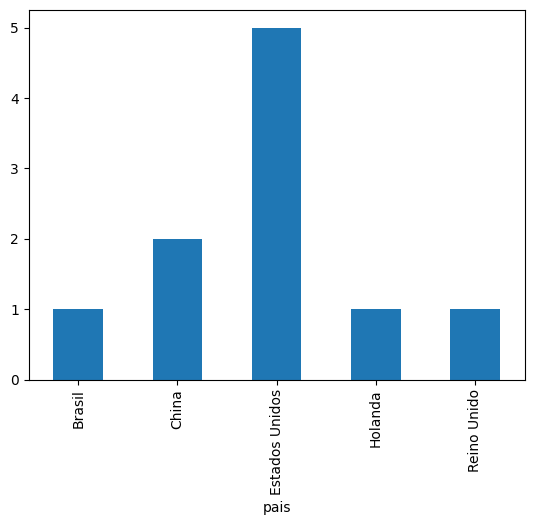

In [24]:
df['pais'].value_counts().sort_index().plot(kind='bar')